In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [2]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
reviews = pd.read_csv('/kaggle/input/british-airline-review-dataset/airline_review.csv', index_col=0)
reviews.shape

(3616, 19)

In [4]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['date_flown'] = pd.to_datetime(reviews['date_flown'])

In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3616 entries, 0 to 3653
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rating               3616 non-null   int64         
 1   header               3616 non-null   object        
 2   author               3616 non-null   object        
 3   date                 3616 non-null   datetime64[ns]
 4   place                3616 non-null   object        
 5   content              3616 non-null   object        
 6   aircraft             1902 non-null   object        
 7   traveller_type       2895 non-null   object        
 8   seat_type            3614 non-null   object        
 9   route                2891 non-null   object        
 10  date_flown           2888 non-null   datetime64[ns]
 11  seat_comfort         3616 non-null   int64         
 12  cabin_staff_service  3616 non-null   int64         
 13  food_beverages       3616 non-null   i

In [6]:
reviews['recommended'] = reviews['recommended'].replace({'no': 0, 'yes': 1})

In [7]:
reviews.describe().T.style \
       .background_gradient('Greens')

,count,mean,min,25%,50%,75%,max,std
rating,3616.000000,4.726770,1.000000,2.000000,4.000000,8.000000,10.000000,3.177900
date,3616,2017-09-14 11:32:55.221238784,2012-08-29 00:00:00,2015-09-04 18:00:00,2017-02-06 00:00:00,2019-03-13 00:00:00,2023-10-03 00:00:00,nan
date_flown,2888,2018-04-28 03:07:28.753462528,2014-07-01 00:00:00,2016-06-01 00:00:00,2017-08-01 00:00:00,2019-09-01 00:00:00,2023-10-01 00:00:00,nan
seat_comfort,3616.000000,2.745852,-1.000000,1.000000,3.000000,4.000000,5.000000,1.504391
cabin_staff_service,3616.000000,3.101770,-1.000000,2.000000,3.000000,5.000000,5.000000,1.659588
food_beverages,3616.000000,2.324668,-1.000000,1.000000,2.000000,4.000000,5.000000,1.776194
ground_service,3616.000000,1.956858,-1.000000,1.000000,2.000000,4.000000,5.000000,2.030015
value_for_money,3616.000000,2.680586,-1.000000,1.000000,3.000000,4.000000,5.000000,1.471356
recommended,3616.000000,0.402102,0.000000,0.000000,0.000000,1.000000,1.000000,0.490390
entertainment,3616.000000,1.504425,-1.000000,-1.000000,1.000000,3.000000,5.000000,2.046616


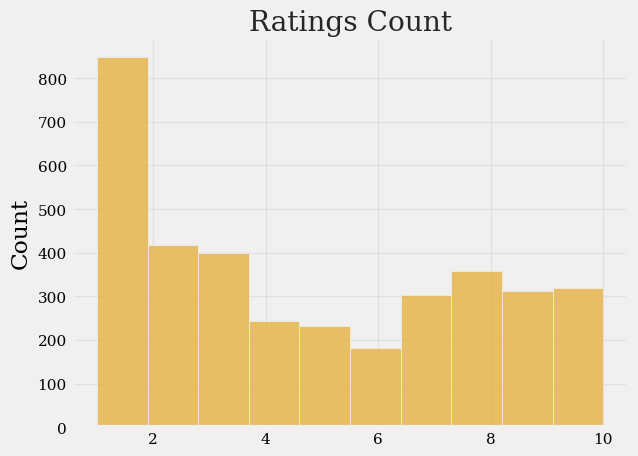

In [8]:
ax = sns.histplot(reviews, x='rating', bins=10, color=color_pal[2]);
ax.set_title('Ratings Count');
ax.set_xlabel(None);

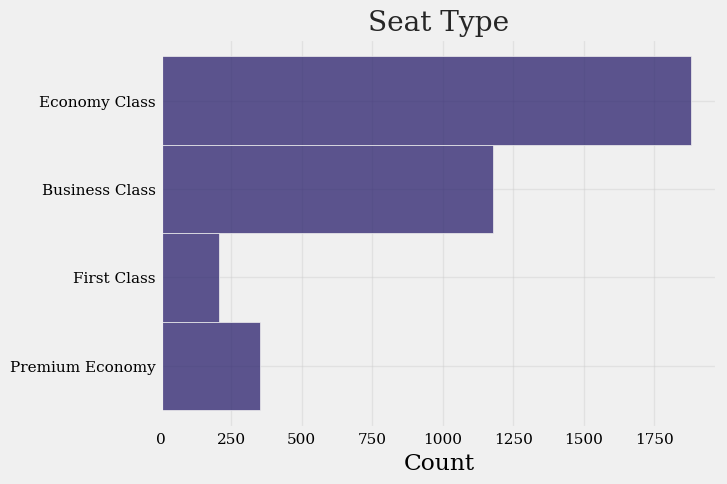

In [9]:
ax = sns.histplot(reviews, y='seat_type', color="#291F6C");
ax.set_title('Seat Type');
ax.set_ylabel(None);

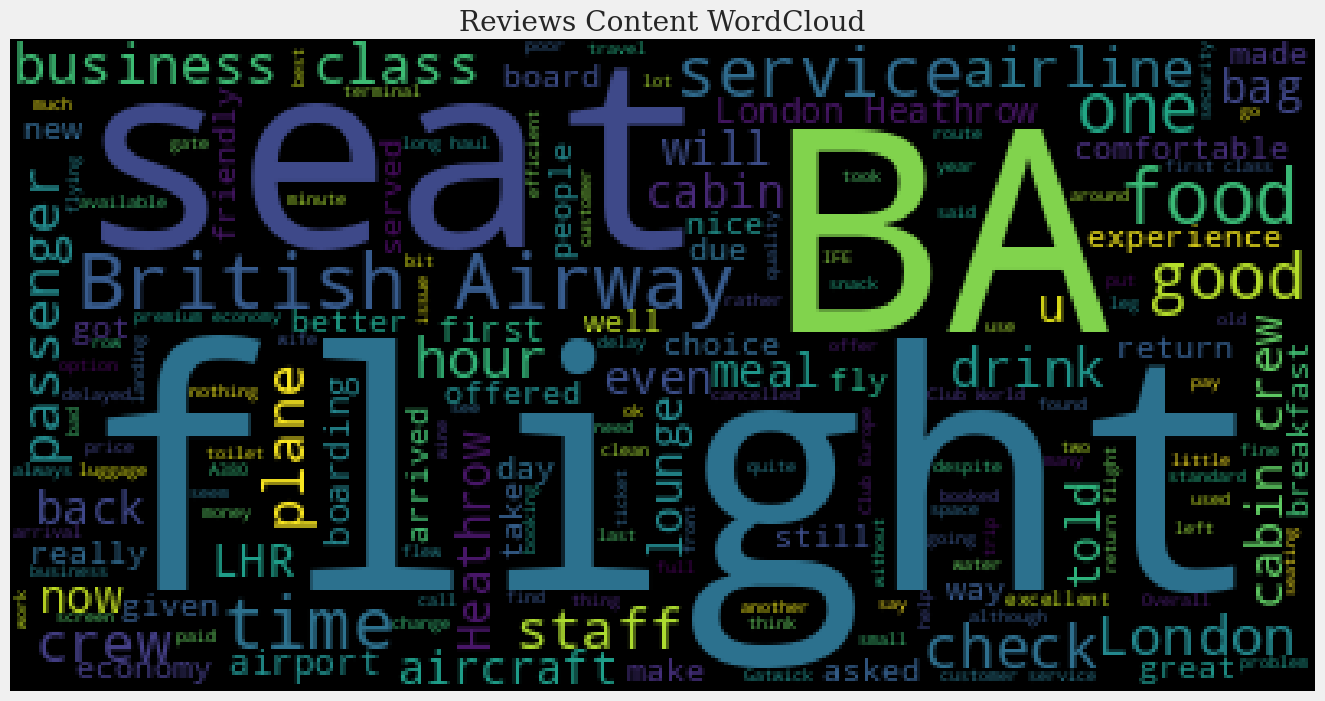

In [10]:
text = ' '.join(i for i in reviews.content)
wordcloud_reviews = WordCloud().generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_reviews);
plt.axis("off");
plt.title('Reviews Content WordCloud');

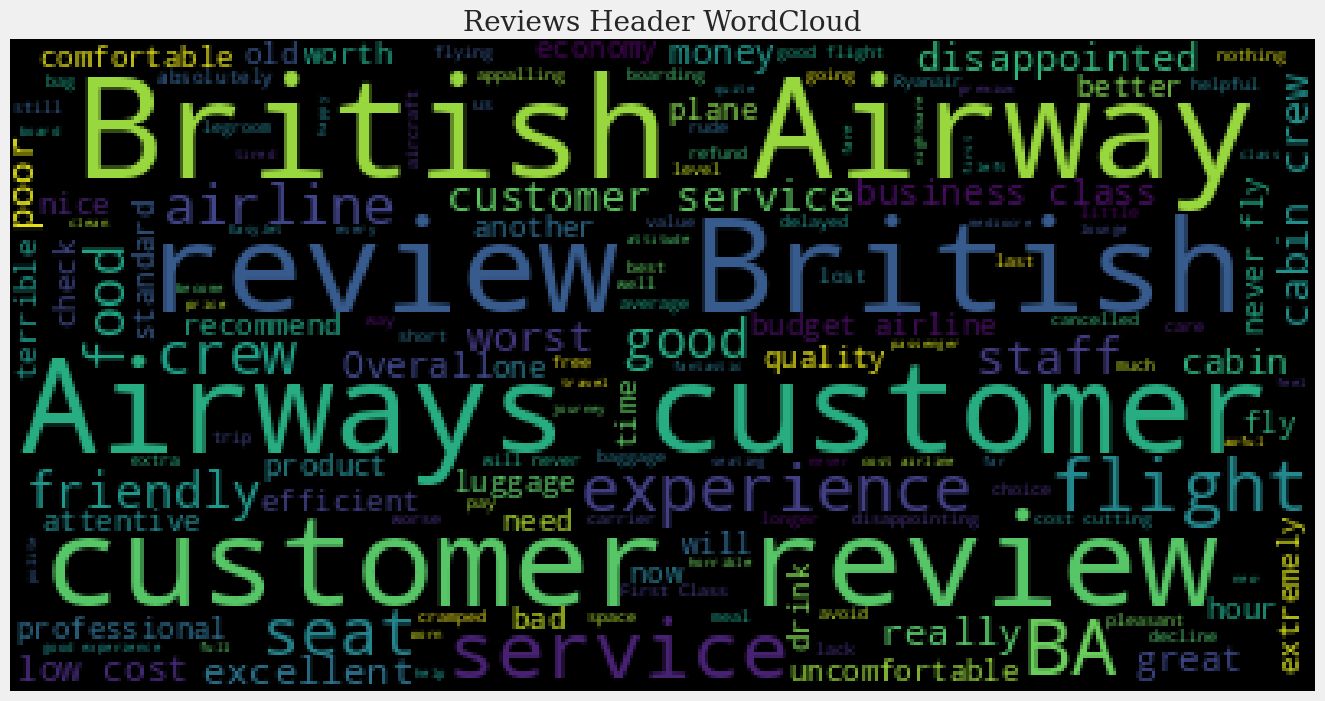

In [11]:
text = ' '.join(i for i in reviews.header)
wordcloud_header = WordCloud().generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_header);
plt.axis("off");
plt.title('Reviews Header WordCloud');

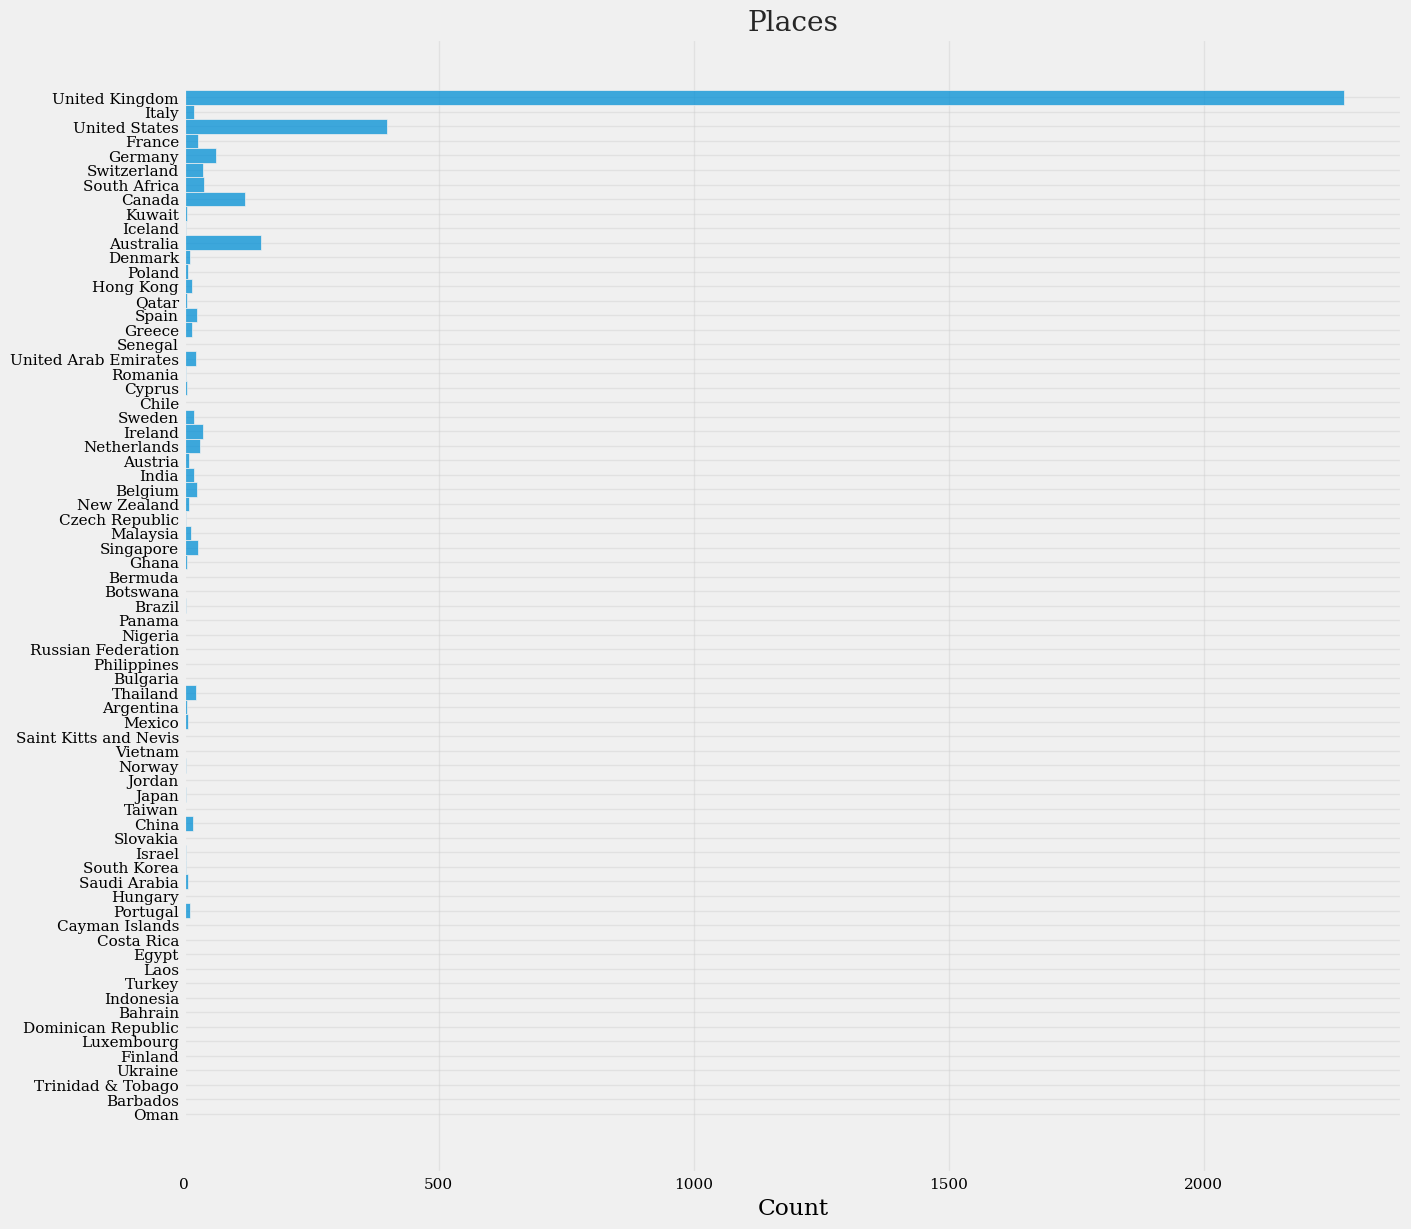

In [12]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.histplot(reviews, y='place', ax=ax);
ax.set_title('Places');
ax.set_ylabel(None);

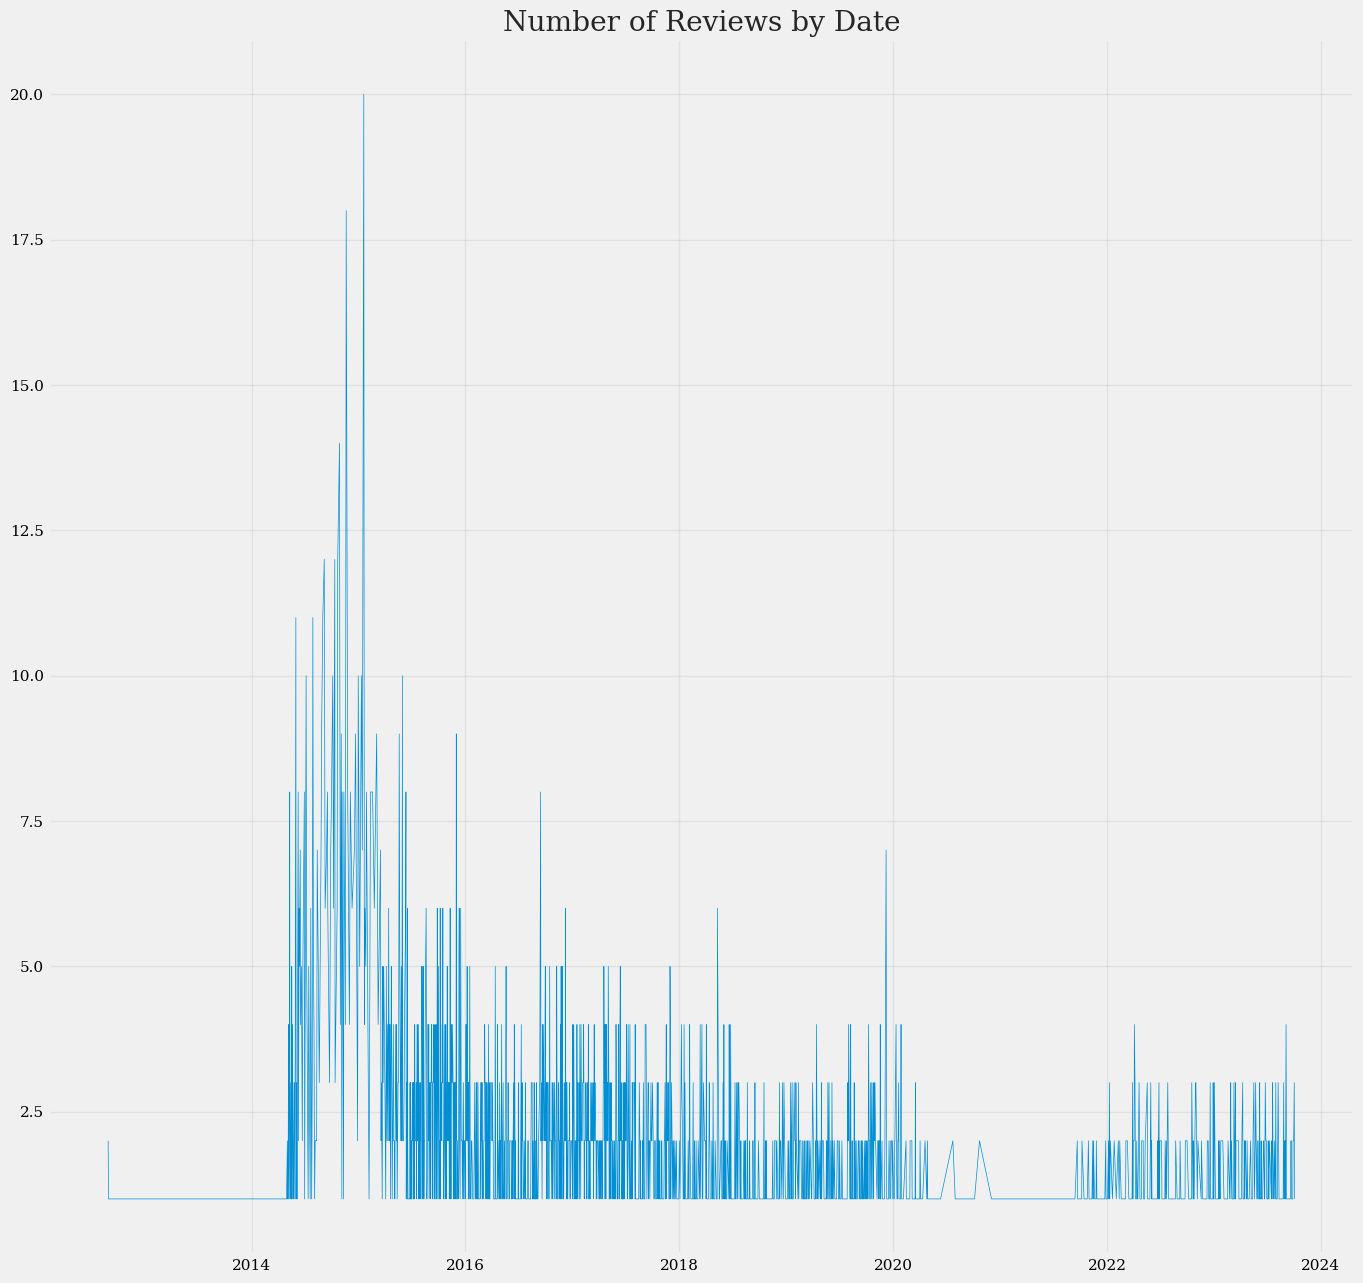

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(reviews.groupby('date').agg({'date': 'count'}), linewidth=.5, ax=ax, legend=False);
ax.set_title('Number of Reviews by Date');
ax.set_xlabel(None);

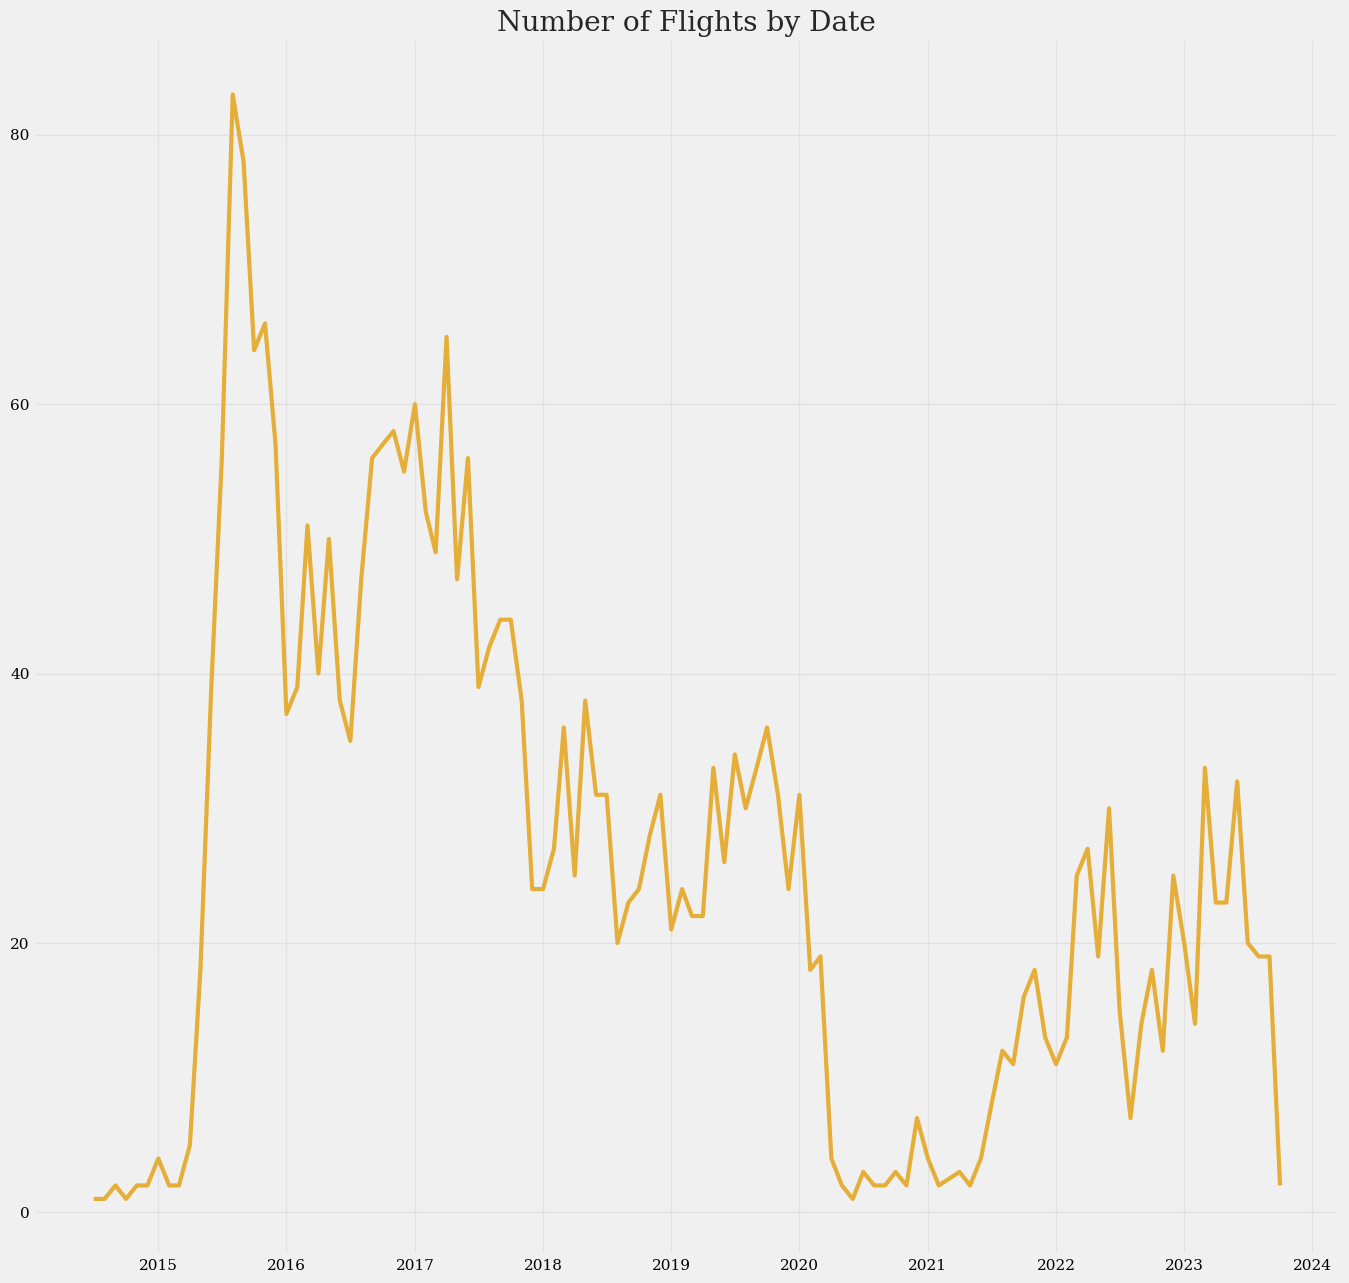

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(reviews.groupby('date_flown').agg({'date_flown': 'count'}),
             linewidth=3, ax=ax, legend=False, palette=[color_pal[2]]);
ax.set_title('Number of Flights by Date');
ax.set_xlabel(None);

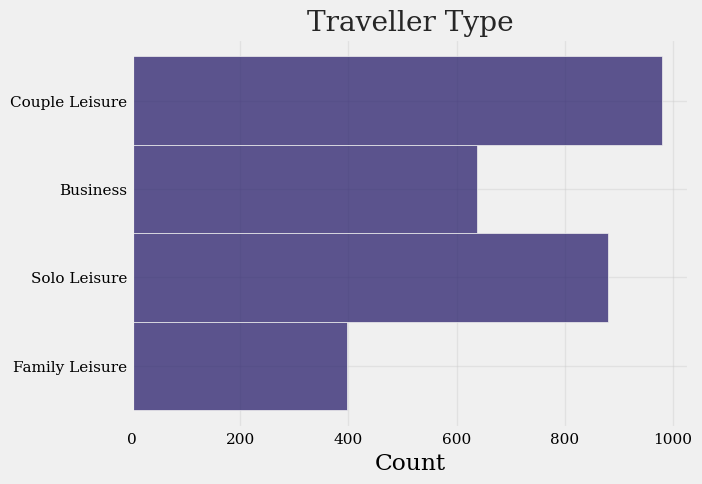

In [15]:
ax = sns.histplot(reviews, y='traveller_type', color="#291F6C");
ax.set_title('Traveller Type');
ax.set_ylabel(None);

In [16]:
reviews['aircraft'] = reviews['aircraft'].str.strip()
reviews['aircraft'] = reviews['aircraft'].str.replace('Airbus ', 'A') \
                                         .str.replace('Boeing ', 'B') \
                                         .str.replace('boeing ', 'B') \
                                         .str.replace('Boieng ', 'B') \
                                         .str.replace('B0eing ', 'B') \
                                         .str.replace('SAAB ', 'Saab ') \
                                         .str.replace('Dreamliner', 'B787') \
                                         .str.replace('B744', 'B747') \
                                         .str.replace('Boeing ', 'B') \
                                         .str.replace('Embraer ', 'E') \
                                         .str.replace('Embraer', 'E') \
                                         .str.replace('EMB', 'E')
reviews['aircraft'] = reviews['aircraft'].apply(lambda x: 'B' + x if str(x).startswith(('727', '737', '747', '757', '767', '777', '787')) else x)
reviews['aircraft'] = reviews['aircraft'].apply(lambda x: x[1:] if str(x).startswith(('AA', 'EE')) else x)
reviews['aircraft'] = reviews['aircraft'].apply(lambda x: 'E' + x[2:] if str(x).startswith('E-') else x)
reviews['aircraft'] = reviews['aircraft'].apply(lambda x: x[:-3] if str(x).endswith('(9)') else x)
reviews['aircraft'] = reviews['aircraft'].apply(lambda x: x[:-4] if str(x).endswith('200') else x)
reviews['aircraft'] = reviews['aircraft'].apply(lambda x: 'B777' if str(x).endswith('200/300') else x)
reviews['aircraft'] = reviews['aircraft'].apply(lambda x: 'B777' if str(x).endswith('Boeing777') else x)
reviews['aircraft'] = reviews['aircraft'].apply(lambda x: 'A320' if str(x).endswith('AA320') else x)
reviews['aircraft'] = reviews['aircraft'].apply(lambda x: 'Saab2000' if str(x) == 'Saab 2000' else x)

reviews['aircraft'] = reviews['aircraft'].str.split('-').str[0]
reviews['aircraft'] = reviews['aircraft'].str.split('NEO').str[0]
reviews['aircraft'] = reviews['aircraft'].str.split('Neo').str[0]
reviews['aircraft'] = reviews['aircraft'].str.split('neo').str[0]
reviews['aircraft'] = reviews['aircraft'].str.split(' Neo').str[0]
reviews['aircraft'] = reviews['aircraft'].str.split(' neo').str[0]

reviews['aircraft'] = reviews['aircraft'].str.split(' 800').str[0]
reviews['aircraft'] = reviews['aircraft'].str.split(' 400').str[0]

reviews['aircraft'] = reviews['aircraft'].str.split(' Finnair').str[0]

reviews['aircraft'] = reviews['aircraft'].apply(lambda x: np.nan if (x == 'Various' or x == 'E' or x == 'A32') else x)
reviews['aircraft'] = reviews['aircraft'].apply(lambda x: 'A319' if (x == 'A19' or x == 'A219') else x)
reviews['aircraft'] = reviews['aircraft'].str.strip()


In [17]:
reviews['aircraft_1'] = reviews['aircraft'].str.replace('and', '/') \
                                           .str.replace(',', '/') \
                                           .str.replace('&', '/') \
                                           .str.replace(' ', '/') \
                                           .str.split('/').str[0]
reviews['aircraft_1'] = reviews['aircraft_1'].str.strip()

In [18]:
reviews['aircraft_2'] = reviews['aircraft'].str.replace('and', '/') \
                                           .str.replace(',', '/') \
                                           .str.replace('&', '/') \
                                           .str.split('/').str[1]
reviews['aircraft_2'] = reviews['aircraft_2'].str.strip()

reviews['aircraft_2'] = reviews['aircraft_2'].apply(lambda x: 'B' + x if str(x).startswith(('727', '737', '747', '757', '767', '777', '787')) else x)
reviews['aircraft_2'] = reviews['aircraft_2'].apply(lambda x: 'A' + x if str(x).startswith(('319', '320', '321', '757', '767', '777', '787')) else x)
reviews['aircraft_2'] = reviews['aircraft_2'].apply(lambda x: 'B787' if str(x).endswith(('788', '789')) else x)

In [19]:
reviews['aircraft_3'] = reviews['aircraft'].str.replace('and', '/') \
                                           .str.replace(',', '/') \
                                           .str.replace('&', '/') \
                                           .str.split('/').str[2]
reviews['aircraft_3'] = reviews['aircraft_3'].str.strip()

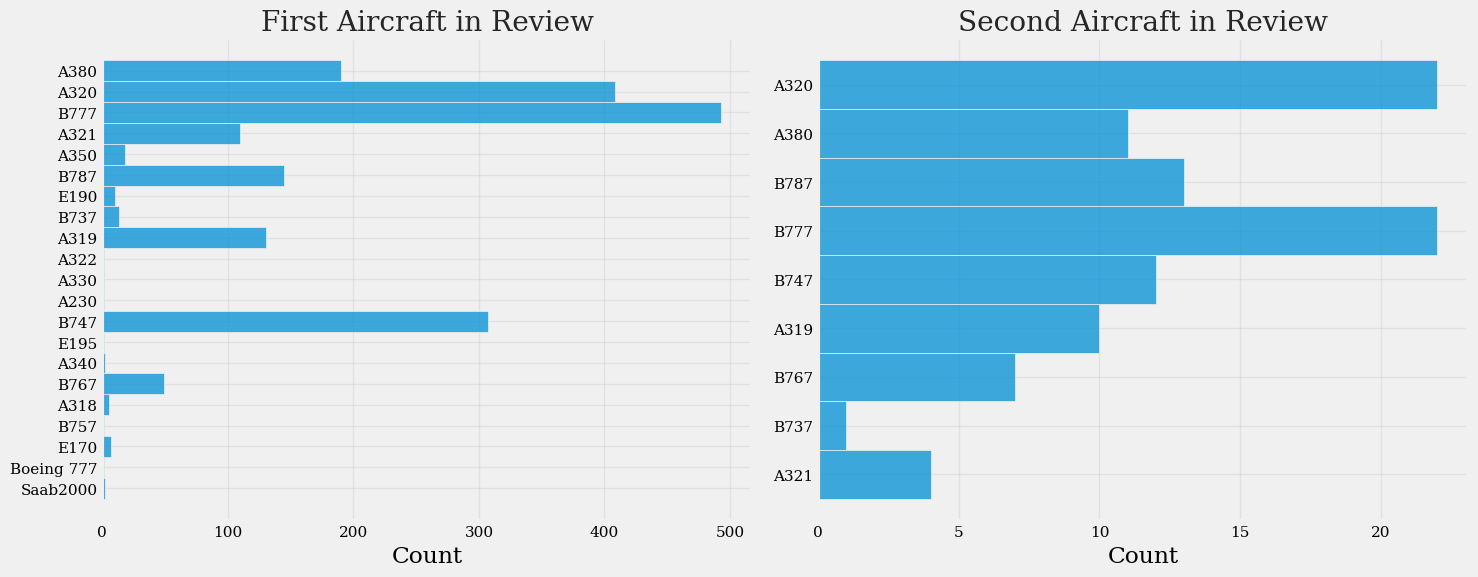

In [20]:
# One 777 doesn't like the idea of being preprocessed
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(reviews, y='aircraft_1', ax=ax[0])
ax[0].set_title("First Aircraft in Review");
ax[0].set_ylabel(None);

sns.histplot(reviews, y='aircraft_2', ax=ax[1])
ax[1].set_title("Second Aircraft in Review");
ax[1].set_ylabel(None);

fig.tight_layout()

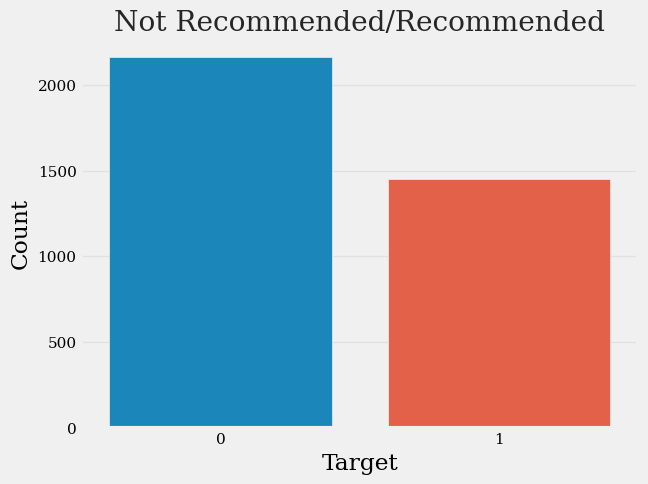

In [21]:
ax = sns.countplot(reviews, x='recommended');
ax.set_title('Not Recommended/Recommended');
ax.set_ylabel('Count');
ax.set_xlabel('Target');

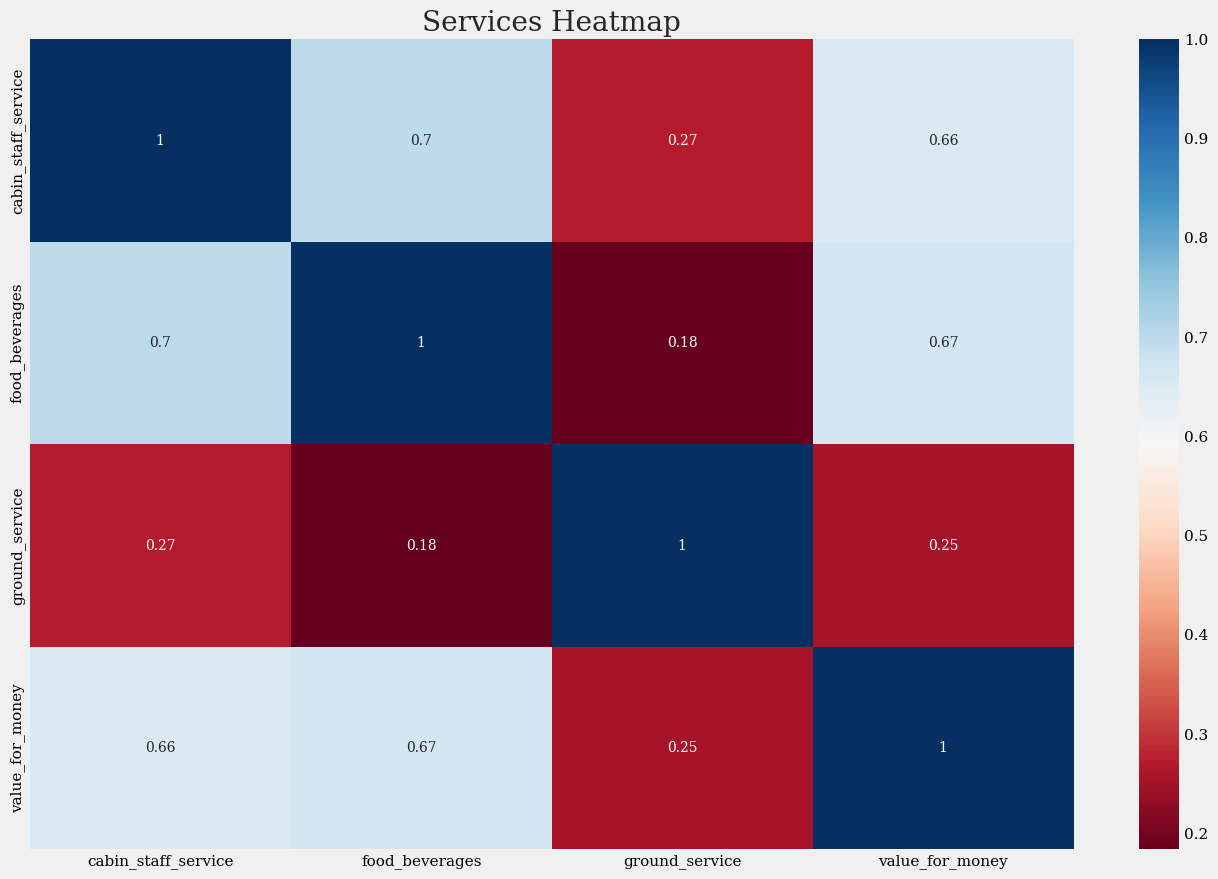

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(reviews[['cabin_staff_service', 'food_beverages',
                     'ground_service', 'value_for_money']].corr(), annot=True,
            annot_kws={"size": 10}, cmap="RdBu", ax=ax);
ax.set_title('Services Heatmap');